In [1]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import seaborn as sns
import sys
import pandas as pd

sys.path.append("../utils")
from bitcode import *
from utils import *
from AlignedDvSound import *

%load_ext autoreload
%autoreload 2

In [2]:
out_dir = r"D:\Fight\rotation\Wei Zhang\projects\courtship song\data\out"

aedat_dir = r"D:\Fight\rotation\Wei Zhang\projects\courtship song\data\aedat"
aedat_fname = 'dvSave-2022_04_02_02_55_09.aedat4'
dv_path = os.path.join(aedat_dir, aedat_fname)

wav_dir = r"D:\Fight\rotation\Wei Zhang\projects\courtship song\data\wav"
wav_name = '20220401_1_main.wav'
wv_path = os.path.join(wav_dir, wav_name)

In [3]:
# choose align roi
# with AedatFile(dv_path) as f:
#     # for frame in f['frames']:
#     img = next(f['frames']).image

# align_roi = cv2.selectROI(img)
# cv2.destroyAllWindows()

# wing_roi = cv2.selectROI(img)
# cv2.destroyAllWindows()
align_roi = (219, 235, 35, 25)
print(align_roi)

(219, 235, 35, 25)


In [3]:
aligned = AlignedDvSound(dv_path, wv_path)
# aligned.autoAlign(time_window=[10, 30], roi=align_roi)

In [6]:
aligned._align = np.array(-10.840875)
print(aligned.align)

-10.840875



slicing dv...
passing packet [100]
passing packet [200]
passing packet [300]
passing packet [400]
passing packet [500]
passing packet [600]
passing packet [700]
passing packet [800]
passing packet [900]
passing packet [1000]
passing packet [1100]
passing packet [1200]
passing packet [1300]
passing packet [1400]
passing packet [1500]
passing packet [1600]
passing packet [1700]
passing packet [1800]
passing packet [1900]
passing packet [2000]
passing packet [2100]
passing packet [2200]
passing packet [2300]
passing packet [2400]
passing packet [2500]
passing packet [2600]
passing packet [2700]
passing packet [2800]
passing packet [2900]
passing packet [3000]
passing packet [3100]
passing packet [3200]
passing packet [3300]
passing packet [3400]
passing packet [3500]
passing packet [3600]
passing packet [3700]
passing packet [3800]
passing packet [3900]
passing packet [4000]
passing packet [4100]
passing packet [4200]
passing packet [4300]
passing packet [4400]
passing packet [4500]
pass

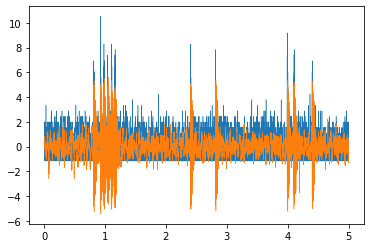

In [5]:
slice = aligned.getSlice([60,65], coord='dv', roi=(211, 223, 55, 37))
plt.plot(np.arange(slice['dv']['x'].shape[0]) / slice['dv']['sr'], normalize(slice['dv']['x']), linewidth=0.5)
plt.plot(np.arange(slice['wv']['x'].shape[0]) / slice['wv']['sr'], normalize(slice['wv']['x']), linewidth=0.5)

In [7]:
# choose align roi
with AedatFile(dv_path) as f:
    # for frame in f['frames']:
    img = next(f['frames']).image

# align_roi = cv2.selectROI(img)
# cv2.destroyAllWindows()

wing_roi = cv2.selectROI(img)
cv2.destroyAllWindows()

In [8]:
print(wing_roi)

(70, 12, 136, 118)


In [18]:
slice = aligned.getSlice([11*60+13, 11*60+15], coord='wv', roi=wing_roi, fps=20000)



slicing dv...
passing packet [100]
passing packet [200]
passing packet [300]
passing packet [400]
passing packet [500]
passing packet [600]
passing packet [700]
passing packet [800]
passing packet [900]
passing packet [1000]
passing packet [1100]
passing packet [1200]
passing packet [1300]
passing packet [1400]
passing packet [1500]
passing packet [1600]
passing packet [1700]
passing packet [1800]
passing packet [1900]
passing packet [2000]
passing packet [2100]
passing packet [2200]
passing packet [2300]
passing packet [2400]
passing packet [2500]
passing packet [2600]
passing packet [2700]
passing packet [2800]
passing packet [2900]
passing packet [3000]
passing packet [3100]
passing packet [3200]
passing packet [3300]
passing packet [3400]
passing packet [3500]
passing packet [3600]
passing packet [3700]
passing packet [3800]
passing packet [3900]
passing packet [4000]
passing packet [4100]
passing packet [4200]
passing packet [4300]
passing packet [4400]
passing packet [4500]
pass

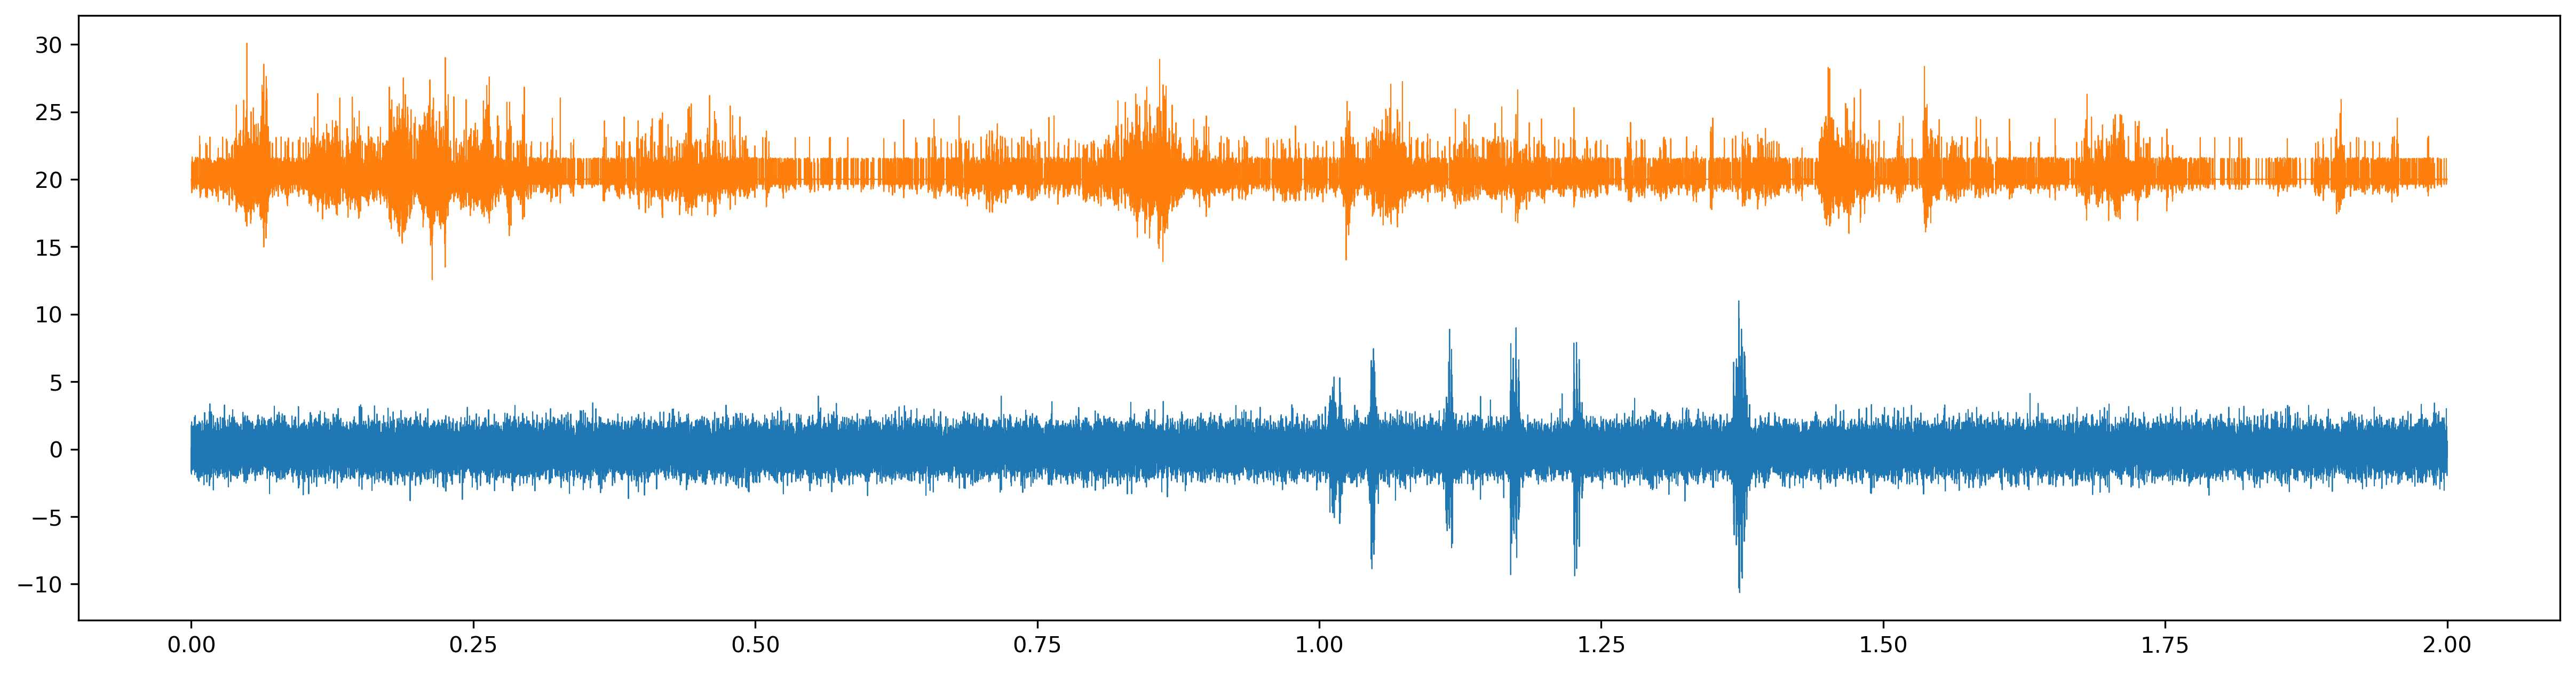

In [33]:
import scipy

plt.figure(figsize=[20,5], dpi=300)

b, a = scipy.signal.butter(3, Wn=2*2000/slice['wv']['sr'], btype='highpass', analog=False, output='ba')
x = scipy.signal.filtfilt(b, a, slice['wv']['x'])
plt.plot(np.arange(x.shape[0]) / slice['wv']['sr'], normalize(x), linewidth=0.5)

b, a = scipy.signal.butter(3, Wn=2*2000/slice['dv']['sr'], btype='highpass', analog=False, output='ba')
x = scipy.signal.filtfilt(b, a, slice['dv']['x'])
plt.plot(np.arange(x.shape[0]) / slice['dv']['sr'], normalize(x) + 20, linewidth=0.5)

In [7]:
# choose align roi
with AedatFile(dv_path) as f:
    # for frame in f['frames']:
    img = next(f['frames']).image

wing_roi = cv2.selectROI(img)
cv2.destroyAllWindows()

print(wing_roi)

slice = aligned.getSlice([14*60+20, 14*60+25], coord='wv', roi=wing_roi, fps=20000)


(160, 98, 62, 97)

slicing dv...
passing packet [100]
passing packet [200]
passing packet [300]
passing packet [400]
passing packet [500]
passing packet [600]
passing packet [700]
passing packet [800]
passing packet [900]
passing packet [1000]
passing packet [1100]
passing packet [1200]
passing packet [1300]
passing packet [1400]
passing packet [1500]
passing packet [1600]
passing packet [1700]
passing packet [1800]
passing packet [1900]
passing packet [2000]
passing packet [2100]
passing packet [2200]
passing packet [2300]
passing packet [2400]
passing packet [2500]
passing packet [2600]
passing packet [2700]
passing packet [2800]
passing packet [2900]
passing packet [3000]
passing packet [3100]
passing packet [3200]
passing packet [3300]
passing packet [3400]
passing packet [3500]
passing packet [3600]
passing packet [3700]
passing packet [3800]
passing packet [3900]
passing packet [4000]
passing packet [4100]
passing packet [4200]
passing packet [4300]
passing packet [4400]
passing 

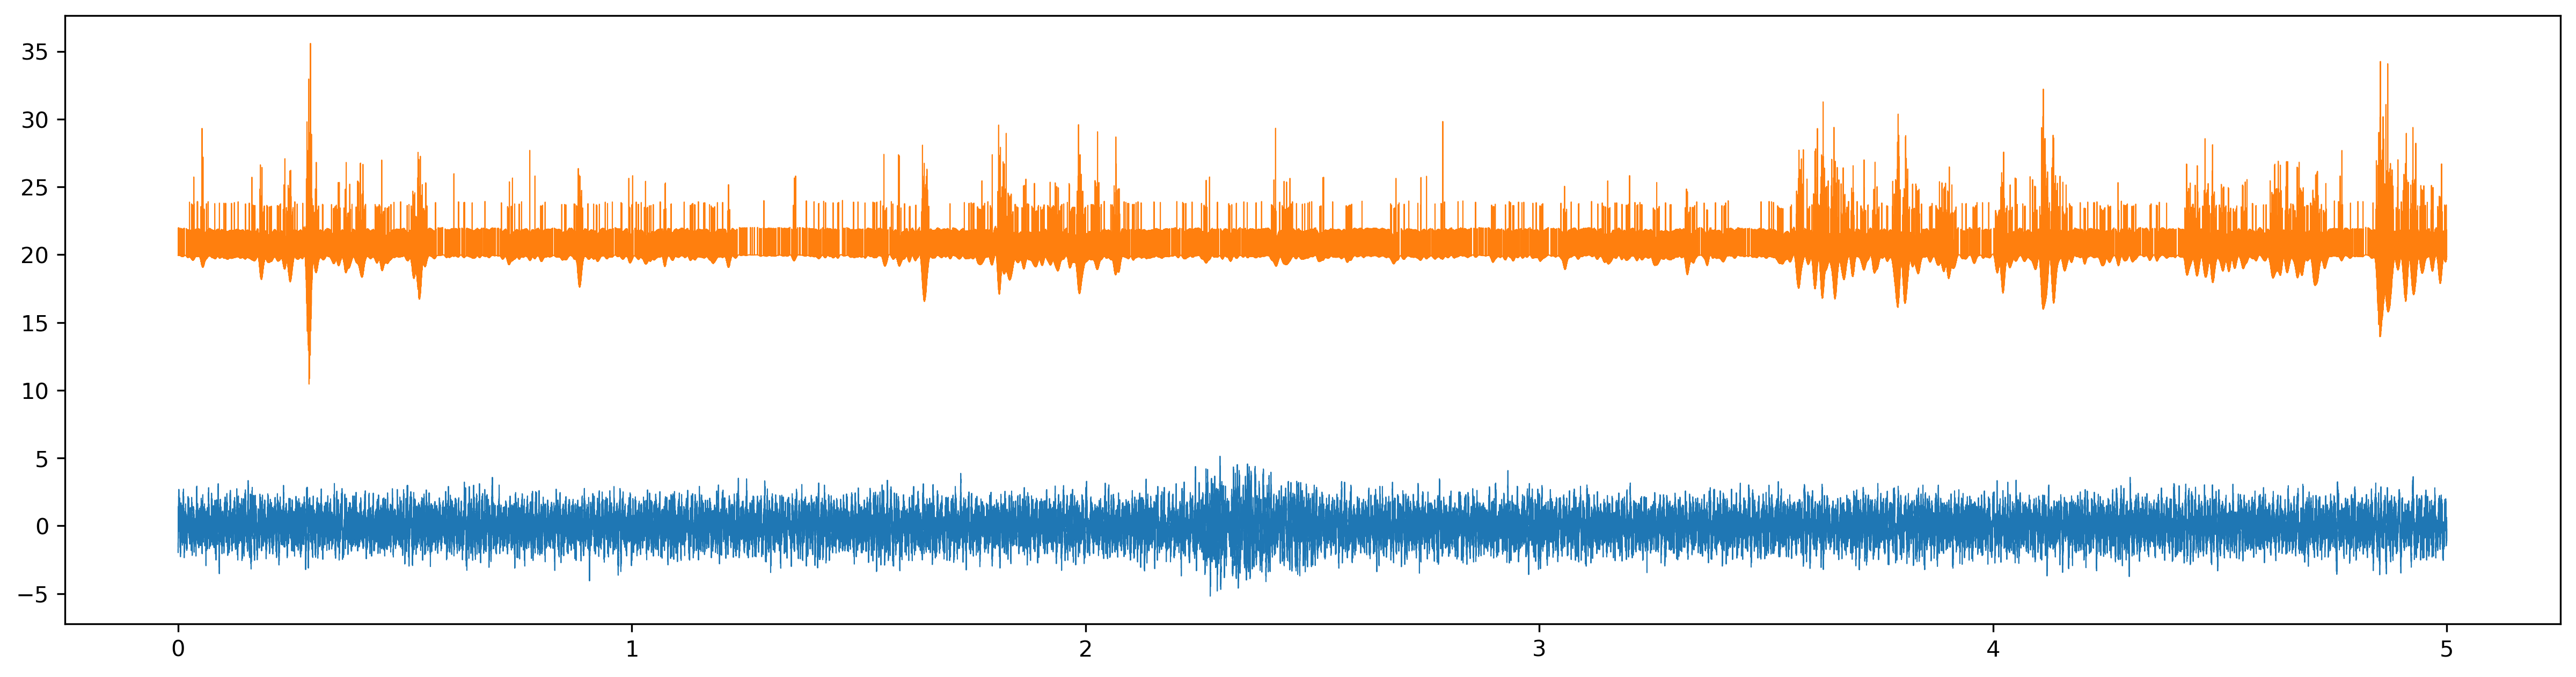

In [9]:
import scipy

plt.figure(figsize=[20,5], dpi=300)

b, a = scipy.signal.butter(3, Wn=2*100/slice['wv']['sr'], btype='highpass', analog=False, output='ba')
x = scipy.signal.filtfilt(b, a, slice['wv']['x'])
plt.plot(np.arange(x.shape[0]) / slice['wv']['sr'], normalize(x), linewidth=0.5)

b, a = scipy.signal.butter(3, Wn=2*100/slice['dv']['sr'], btype='highpass', analog=False, output='ba')
x = scipy.signal.filtfilt(b, a, slice['dv']['x'])
plt.plot(np.arange(x.shape[0]) / slice['dv']['sr'], normalize(x) + 20, linewidth=0.5)

plt.show()

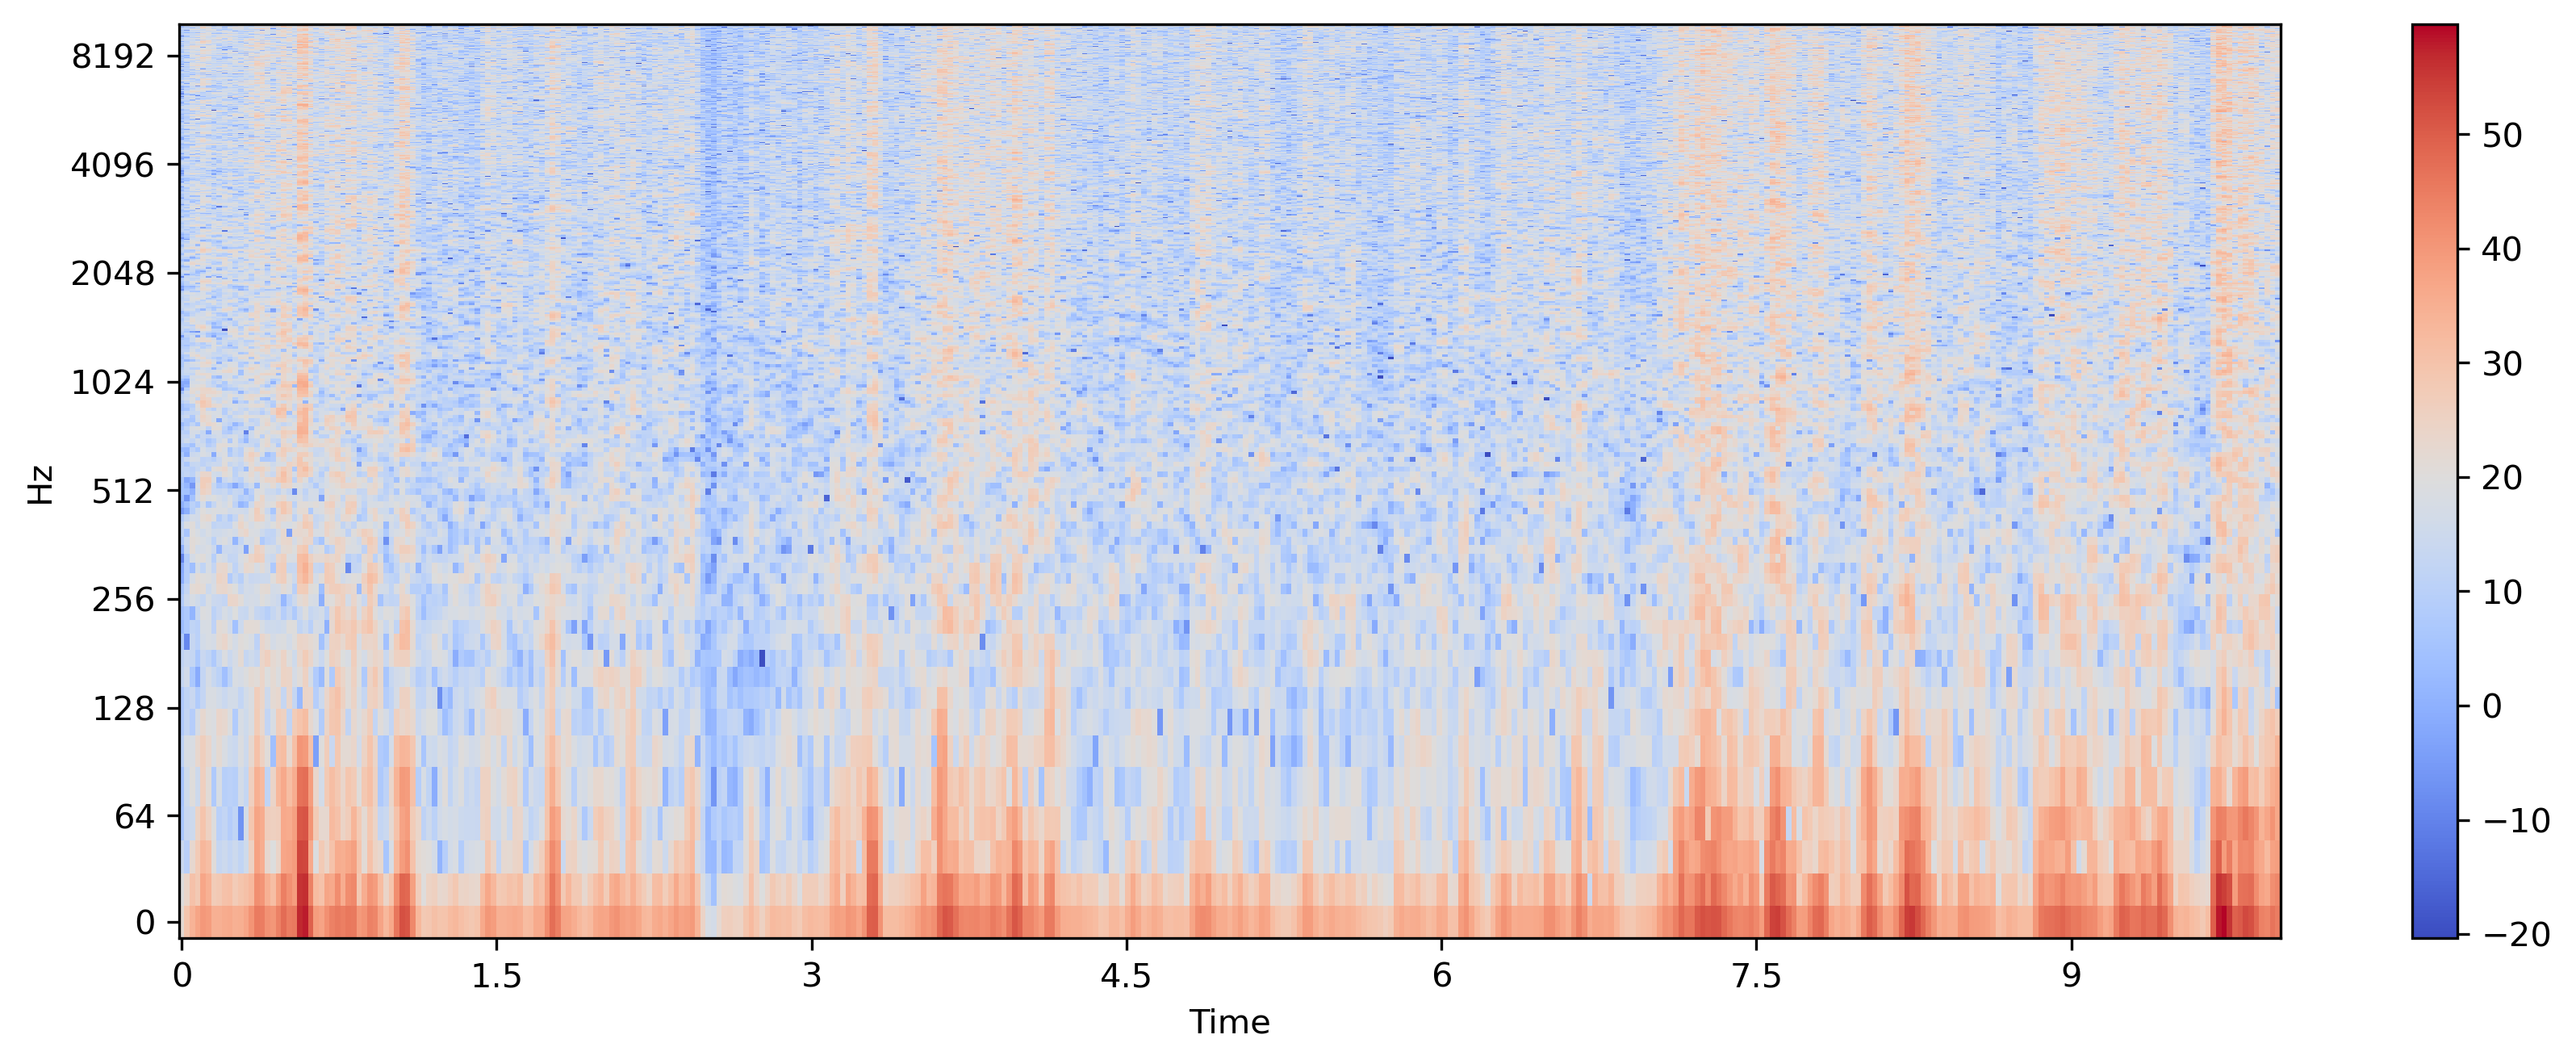

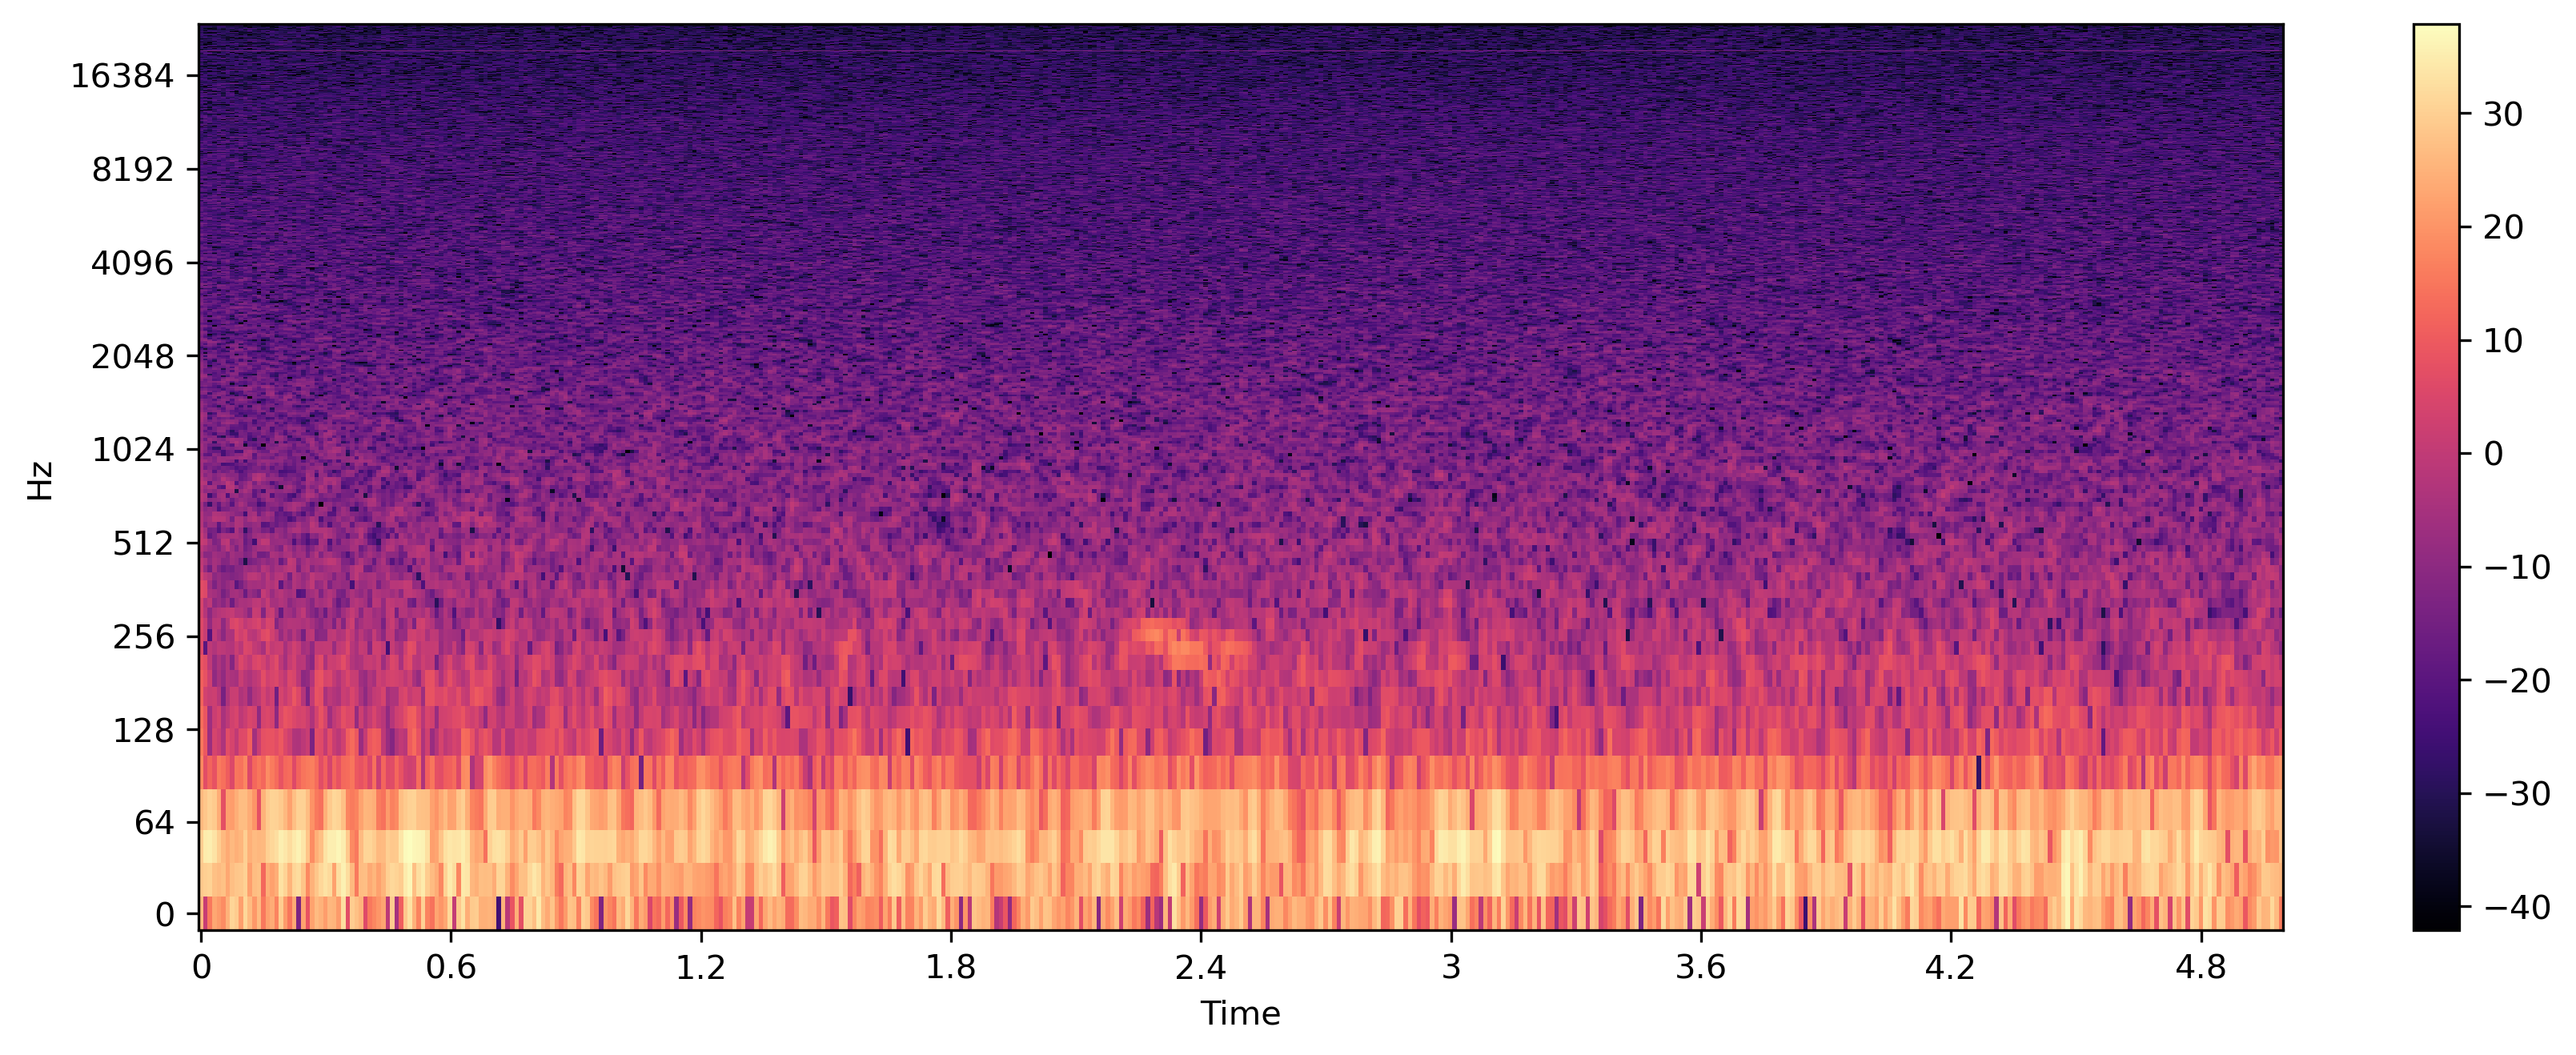

In [11]:
show_spec(slice['dv']['x'], slice['dv']['sr'], n_fft=1024)
show_spec(slice['wv']['x'], slice['wv']['sr'], n_fft=2048)